# Численное решение ОДУ: От теории к практике на Julia

## Введение

Дифференциальные уравнения — это язык, на котором говорит природа. Они описывают, как что-то меняется со временем: рост популяции, остывание кофе, движение планет или распространение вируса.

Обыкновенное дифференциальное уравнение (ОДУ) первого порядка выглядит так:

$$ \frac{dy}{dt} = f(t, y) $$

Где:
*   $t$ — время (независимая переменная).
*   $y$ — состояние системы (зависимая переменная).
*   $f$ — правило, которое говорит, как быстро меняется $y$ в данный момент.

**Проблема:** Большинство интересных уравнений нельзя решить "на бумаге" (получить красивую формулу). Поэтому мы используем компьютеры, чтобы найти решение приближенно, шаг за шагом.

## Метод Эйлера: Самый простой подход

Представьте, что вы стоите на склоне горы. Вы знаете, в какую сторону и насколько круто идет склон прямо под вашими ногами (это производная $f(t, y)$).

Метод Эйлера предлагает сделать маленький шаг в этом направлении, остановиться, снова оценить наклон и сделать следующий шаг.

Формула метода Эйлера:
$$ y_{new} = y_{old} + h \cdot f(t_{old}, y_{old}) $$

Где $h$ — размер шага по времени. Чем меньше шаг, тем точнее результат, но тем больше вычислений нужно сделать.

In [17]:
# Подключаем необходимые библиотеки для построения графиков
using Plots
using LaTeXStrings # Для красивых математических формул на графиках
using Interact # Для интерактивности (опционально, но полезно)

# Устанавливаем стиль графиков
gr() 
default(
    legend = :topleft,
    linewidth = 2,
    titlefont = 10,
    guidefont = 10
)

println("Библиотеки загружены. Приступаем к реализации метода Эйлера.")

Библиотеки загружены. Приступаем к реализации метода Эйлера.


## Реализация метода Эйлера на Julia

Напишем универсальную функцию, которая принимает:
1.  `f` — функцию, описывающую уравнение.
2.  `y0` — начальное условие.
3.  `tspan` — промежуток времени $(t_{start}, t_{end})$.
4.  `h` — шаг интегрирования.

Функция вернет массивы времени `t` и решения `y`.

In [18]:
function euler_method(f, y0, tspan, h)
    t_start, t_end = tspan
    # Создаем вектор времени с шагом h
    t = t_start:h:t_end

    # Инициализируем вектор решения
    # Для скалярного y0 используем массив чисел,
    # для векторного y0 — массив векторов (хранит состояния системы).
    if isa(y0, Number)
        y = zeros(eltype(y0), length(t))
    else
        YT = typeof(y0)
        y = Vector{YT}(undef, length(t))
    end
    y[1] = y0

    # Основной цикл метода Эйлера
    for i in 1:(length(t)-1)
        y[i+1] = y[i] + h * f(t[i], y[i])
    end

    return t, y
end

# Проверка функции на простом примере: y' = 1, y(0) = 0 => y = t
f_test(t, y) = 1
t, y = euler_method(f_test, 0.0, (0.0, 5.0), 0.1)
println("Первые 5 значений y: ", y[1:5])

Первые 5 значений y: [0.0, 0.1, 0.2, 0.30000000000000004, 0.4]


## Пример 1: Радиоактивный распад (Сравнение с точным решением)

Рассмотрим закон радиоактивного распада. Скорость распада пропорциональна текущему количеству вещества.

Уравнение:
$$ \frac{dy}{dt} = -k \cdot y $$

Точное решение (формула):
$$ y(t) = y_0 \cdot e^{-kt} $$

Здесь мы сможем увидеть ошибку метода Эйлера, сравнив его с формулой.

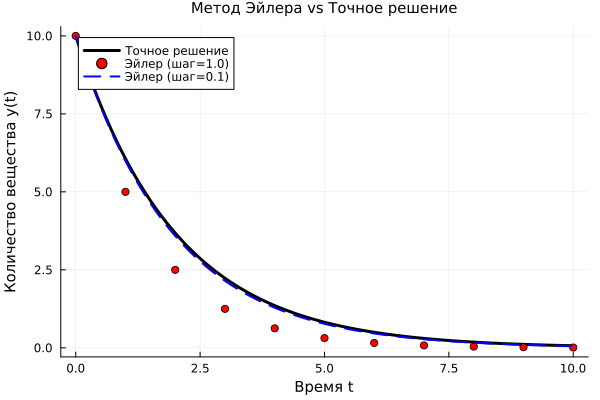

In [19]:
# Параметры задачи
k = 0.5          # Константа распада
y0 = 10.0        # Начальное количество вещества
tspan = (0.0, 10.0)

# Функция правой части уравнения
f_decay(t, y) = -k * y

# Точное решение (для сравнения)
exact_solution(t) = y0 * exp(-k * t)

# Решаем методом Эйлера с разным шагом
h_large = 1.0    # Грубый шаг
h_fine = 0.1     # Мелкий шаг

t_large, y_large = euler_method(f_decay, y0, tspan, h_large)
t_fine, y_fine = euler_method(f_decay, y0, tspan, h_fine)

# Вектор для точного решения
t_exact = range(tspan[1], tspan[2], length=100)
y_exact = exact_solution.(t_exact)

# Построение графика
plot(t_exact, y_exact, label="Точное решение", linewidth=3, color=:black)
scatter!(t_large, y_large, label="Эйлер (шаг=1.0)", marker=:circle, color=:red)
plot!(t_fine, y_fine, label="Эйлер (шаг=0.1)", linestyle=:dash, color=:blue)
xlabel!("Время t")
ylabel!("Количество вещества y(t)")
title!("Метод Эйлера vs Точное решение")

### Анализ ошибки в зависимости от шага

Давайте посмотрим, как уменьшается ошибка, если мы делаем шаг меньше. Ожидаем, что ошибка метода Эйлера пропорциональна шагу $h$ (первый порядок точности).

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Александр\.julia\packages\PlotUtils\HX80C\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Александр\.julia\packages\PlotUtils\HX80C\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Александр\.julia\packages\PlotUtils\HX80C\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Александр\.julia\packages\PlotUtils\HX80C\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Александр\.julia\packages\PlotUtils\HX80C\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Александр\.julia\packages\PlotUtils\HX80C\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Александр\.julia\packages\PlotUtils\HX80C\src\ticks.jl:194


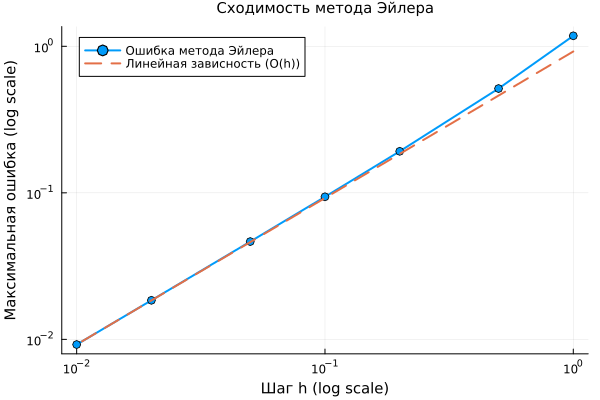

In [20]:
# Функция для вычисления максимальной ошибки
function max_error(f, y0, tspan, h, exact_func)
    t, y_num = euler_method(f, y0, tspan, h)
    y_ex = exact_func.(t)
    return maximum(abs.(y_num .- y_ex))
end

# Перебираем разные шаги
steps = [1.0, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01]
errors = [max_error(f_decay, y0, tspan, h, exact_solution) for h in steps]

# График ошибки в логарифмическом масштабе
plot(steps, errors, label="Ошибка метода Эйлера", marker=:o, scale=:log10, linewidth=2)
# Линия для сравнения (пропорциональна h)
plot!(steps, errors[end] * (steps ./ steps[end]), label="Линейная зависность (O(h))", linestyle=:dash)
xlabel!("Шаг h (log scale)")
ylabel!("Максимальная ошибка (log scale)")
title!("Сходимость метода Эйлера")

## Пример 2: Логистический рост (Чувствительность к начальным условиям)

В биологии популяция не может расти бесконечно. Есть предел $K$ (емкость среды).
Уравнение:
$$ \frac{dy}{dt} = r \cdot y \cdot (1 - \frac{y}{K}) $$

Интересно посмотреть, как ведут себя решения, если мы чуть-чуть изменим начальное количество особей.

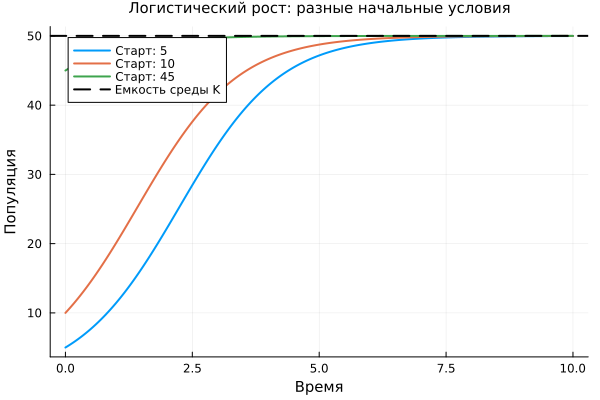

In [21]:
# Параметры
r = 1.0       # Скорость роста
K = 50.0      # Емкость среды
tspan = (0.0, 10.0)
h = 0.05

f_logistic(t, y) = r * y * (1 - y / K)

# Три разных начальных условия
y0_1 = 5.0
y0_2 = 10.0
y0_3 = 45.0 # Начинаем близко к пределу

t1, y1 = euler_method(f_logistic, y0_1, tspan, h)
t2, y2 = euler_method(f_logistic, y0_2, tspan, h)
t3, y3 = euler_method(f_logistic, y0_3, tspan, h)

plot(t1, y1, label="Старт: 5", linewidth=2)
plot!(t2, y2, label="Старт: 10", linewidth=2)
plot!(t3, y3, label="Старт: 45", linewidth=2)
hline!([K], label="Емкость среды K", linestyle=:dash, color=:black)
xlabel!("Время")
ylabel!("Популяция")
title!("Логистический рост: разные начальные условия")

## Анимация процесса решения

Чтобы понять, как метод Эйлера "строит" решение шаг за шагом, создадим анимацию. Мы будем рисовать касательные на каждом шаге.

In [22]:
# Функция для создания анимации одного шага
function animate_euler(f, y0, tspan, h; filename="euler_anim.gif")
    t, y = euler_method(f, y0, tspan, h)
    
    # Создаем объект анимации
    anim = @animate for i in 1:length(t)
        # Рисуем точное решение (фоном)
        t_smooth = range(tspan[1], tspan[2], length=200)
        # Для примера используем экспоненту, если не передана точная ф-ция
        # В реальном проекте лучше передавать exact_func
        y_smooth = y0 .* exp.(-0.5 .* t_smooth)
        plot(t_smooth, y_smooth, label="Точное (для примера)", color=:lightgray, linewidth=2)
        
        # Рисуем то, что уже посчитано
        plot!(t[1:i], y[1:i], label="Метод Эйлера", color=:red, marker=:o, linewidth=2)
        
        # Рисуем касательную на текущем шаге (если не последняя точка)
        if i < length(t)
            slope = f(t[i], y[i])
            # Линия касательной длиной в один шаг
            t_tangent = [t[i], t[i+1]]
            y_tangent = [y[i], y[i] + slope * h]
            plot!(t_tangent, y_tangent, label="", color=:green, linestyle=:dash, linewidth=1)
        end
        
        xlims!(tspan)
        ylims!(minimum(y)*0.9, maximum(y)*1.1)
        title!("Шаг $(i-1): t = $(round(t[i], digits=2))")
    end
    
    # Сохраняем анимацию
    gif(anim, filename, fps=10)
    println("Анимация сохранена как $filename")
end

# Запуск анимации для уравнения распада
# Примечание: В реальной среде выполнения это создаст файл
animate_euler(f_decay, 10.0, (0.0, 5.0), 0.5)

Анимация сохранена как euler_anim.gif


┌ Info: Saved animation to c:\Users\Александр\Documents\Projects2026\JuliaProg\JuliaPrograms\euler_anim.gif
└ @ Plots C:\Users\Александр\.julia\packages\Plots\GIume\src\animation.jl:156


## Пример 3: Гармонический осциллятор (Система ОДУ)

Многие задачи в физике и биологии описываются системами уравнений. Например, колебания маятника или взаимодействие хищник-жертва.

Простейший осциллятор (пружина):
$$ \begin{cases} \frac{dx}{dt} = v \\ \frac{dv}{dt} = -x \end{cases} $$

Здесь $x$ — координата, $v$ — скорость. В Julia мы можем передавать в нашу функцию `euler_method` вектор начальных условий `[x0, v0]`, и она будет работать!

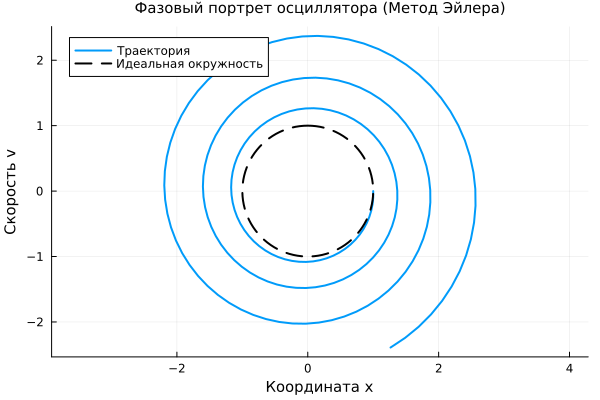

In [23]:
# Правая часть системы. y теперь вектор [x, v]
function f_oscillator(t, y)
    x = y[1]
    v = y[2]
    dx = v
    dv = -x
    return [dx, dv]
end

y0_sys = [1.0, 0.0] # Начальное отклонение 1, скорость 0
tspan_sys = (0.0, 20.0)
h_sys = 0.1

t_sys, y_sys = euler_method(f_oscillator, y0_sys, tspan_sys, h_sys)

# Извлекаем x и v из результата (каждая строка y_sys - это вектор состояния)
x_sol = [y[1] for y in y_sys]
v_sol = [y[2] for y in y_sys]

# Фазовый портрет (зависимость скорости от координаты)
plot(x_sol, v_sol, label="Траектория", aspect_ratio=:equal, linewidth=2)
circle = range(0, 2π, length=100)
plot!(sin.(circle), cos.(circle), label="Идеальная окружность", linestyle=:dash, color=:black)
xlabel!("Координата x")
ylabel!("Скорость v")
title!("Фазовый портрет осциллятора (Метод Эйлера)")

### Наблюдение: Энергия не сохраняется!

Если вы посмотрите на график выше, вы заметите, что спираль **раскручивается**. В реальной физической системе без трения маятник должен колебаться вечно по кругу. 

Метод Эйлера накапливает ошибку так, что система искусственно "разгоняется". Это главный недостаток явного метода Эйлера для колебательных задач. Для таких задач используют более сложные методы (например, Верле или Рунге-Кутты), но Эйлер идеален для понимания сути.

## Итоги занятия

1.  **Численные методы** позволяют решать уравнения, которые не берутся аналитически.
2.  **Метод Эйлера** прост: $y_{new} = y_{old} + h \cdot f(t, y)$.
3.  **Шаг $h$** важен: слишком большой шаг дает большую ошибку, слишком маленький — долго считается.
4.  **Системы ОДУ** решаются так же, просто $y$ становится вектором.
5.  **Julia** позволяет писать код, который работает быстро и выглядит почти как математическая формула.

## Домашнее задание

1.  Попробуйте изменить функцию `f_oscillator` на модель "Хищник-Жертва" (Лотки-Вольтерры).
2.  Уменьшите шаг $h$ в осцилляторе. Станет ли спираль ближе к кругу?
3.  Попробуйте реализовать метод Эйлера-Коши (улучшенный Эйлер) и сравните точность.

## Модель 1: SIR-модель эпидемии (Кермак-МакКендрик, 1927)

Одна из самых известных моделей в математической эпидемиологии. Популяция делится на три группы:

*   **S (Susceptible)** — восприимчивые (здоровые, но могут заразиться)
*   **I (Infected)** — заражённые (больные и распространяющие инфекцию)
*   **R (Recovered)** — выздоровевшие (иммунные или умершие)

Система уравнений:
$$
\begin{cases}
\frac{dS}{dt} = -\beta \cdot S \cdot I \\
\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I \\
\frac{dR}{dt} = \gamma \cdot I
\end{cases}
$$

Где:
*   $\beta$ — коэффициент заражения (контактность × вероятность передачи)
*   $\gamma$ — коэффициент выздоровления ($1/\gamma$ = средняя длительность болезни)

**Важное свойство:** $S + I + R = N$ (общая численность популяции сохраняется)

Максимальное отклонение от N=1: 2.220446049250313e-16


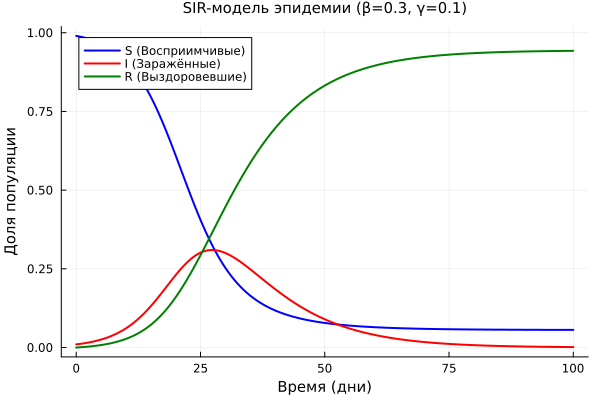

In [24]:
# SIR-модель: реализация на Julia

function sir_model(t, y)
    S, I, R = y
    β = 0.3      # Коэффициент заражения
    γ = 0.1      # Коэффициент выздоровления
    
    dS = -β * S * I
    dI = β * S * I - γ * I
    dR = γ * I
    
    return [dS, dI, dR]
end

# Начальные условия (нормированные на долю популяции)
S0 = 0.99    # 99% восприимчивых
I0 = 0.01    # 1% заражённых
R0 = 0.0     # 0% выздоровевших
y0_sir = [S0, I0, R0]

tspan_sir = (0.0, 100.0)
h_sir = 0.5

t_sir, y_sir = euler_method(sir_model, y0_sir, tspan_sir, h_sir)

# Извлекаем компоненты
S_sol = [y[1] for y in y_sir]
I_sol = [y[2] for y in y_sir]
R_sol = [y[3] for y in y_sir]

# Проверка сохранения популяции
total_pop = S_sol .+ I_sol .+ R_sol
println("Максимальное отклонение от N=1: $(maximum(abs.(total_pop .- 1)))")

# Построение графика
plot(t_sir, S_sol, label="S (Восприимчивые)", linewidth=2, color=:blue)
plot!(t_sir, I_sol, label="I (Заражённые)", linewidth=2, color=:red)
plot!(t_sir, R_sol, label="R (Выздоровевшие)", linewidth=2, color=:green)
xlabel!("Время (дни)")
ylabel!("Доля популяции")
title!("SIR-модель эпидемии (β=0.3, γ=0.1)")

### Анализ SIR-модели: Порог эпидемии

Эпидемия начнётся только если $\frac{\beta S_0}{\gamma} > 1$. Это число называется **базовым репродуктивным числом** $R_0$.

*   Если $R_0 > 1$ — эпидемия распространяется
*   Если $R_0 < 1$ — инфекция затухает

Давайте исследуем, как изменение параметров влияет на пик эпидемии.

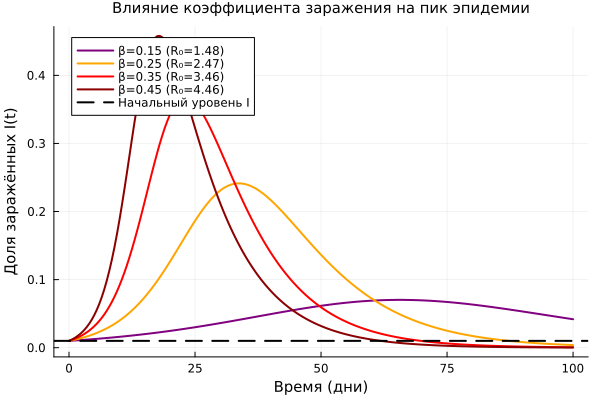

In [25]:
# Исследование зависимости от коэффициента заражения β

function run_sir(β_val; γ=0.1, S0=0.99, I0=0.01, tspan=(0.0, 100.0), h=0.5)
    f(t, y) = [-β_val * y[1] * y[2], 
                β_val * y[1] * y[2] - γ * y[2], 
                γ * y[2]]
    t, y = euler_method(f, [S0, I0, 0.0], tspan, h)
    I_peak = maximum([y_i[2] for y_i in y])
    return t, y, I_peak
end

β_values = [0.15, 0.25, 0.35, 0.45]
colors = [:purple, :orange, :red, :darkred]

plot()
for (i, β_val) in enumerate(β_values)
    t, y, I_peak = run_sir(β_val)
    I_sol = [y_i[2] for y_i in y]
    R0_val = β_val * 0.99 / 0.1
    plot!(t, I_sol, label="β=$β_val (R₀=$(round(R0_val, digits=2)))", 
          linewidth=2, color=colors[i])
end

hline!([0.01], label="Начальный уровень I", linestyle=:dash, color=:black)
xlabel!("Время (дни)")
ylabel!("Доля заражённых I(t)")
title!("Влияние коэффициента заражения на пик эпидемии")

## Модель 2: Фармакокинетика (Однокамерная модель)

Описывает концентрацию лекарства в крови после приёма дозы. Это основа для расчёта режима дозирования в медицине.

Уравнение:
$$ \frac{dC}{dt} = -k_e \cdot C $$

Где:
*   $C$ — концентрация препарата в крови
*   $k_e$ — константа элиминации (выведения)

**Точное решение:**
$$ C(t) = C_0 \cdot e^{-k_e t} $$

**Важные параметры:**
*   $t_{1/2} = \frac{\ln(2)}{k_e}$ — период полувыведения
*   $AUC = \int_0^\infty C(t)dt = \frac{C_0}{k_e}$ — площадь под кривой (экспозиция)

Период полувыведения: 3.47 часов


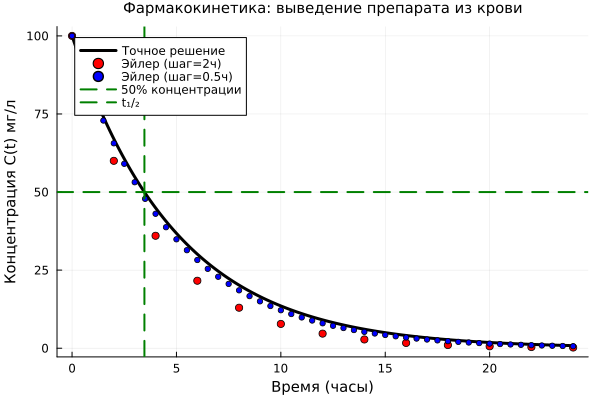

In [26]:
# Фармакокинетическая модель с точным решением

ke = 0.2           # Константа элиминации (1/час)
C0 = 100.0         # Начальная концентрация (мг/л)
tspan_pk = (0.0, 24.0)

f_pk(t, C) = -ke * C
exact_pk(t) = C0 * exp(-ke * t)

# Период полувыведения
t_half = log(2) / ke
println("Период полувыведения: $(round(t_half, digits=2)) часов")

# Численное решение с разными шагами
h1, h2 = 2.0, 0.5
t1, C1 = euler_method(f_pk, C0, tspan_pk, h1)
t2, C2 = euler_method(f_pk, C0, tspan_pk, h2)

# Точное решение
t_exact = range(tspan_pk[1], tspan_pk[2], length=200)
C_exact = exact_pk.(t_exact)

# График
plot(t_exact, C_exact, label="Точное решение", linewidth=3, color=:black)
scatter!(t1, C1, label="Эйлер (шаг=2ч)", marker=:circle, color=:red, markersize=4)
scatter!(t2, C2, label="Эйлер (шаг=0.5ч)", marker=:circle, color=:blue, markersize=3)
hline!([C0/2], label="50% концентрации", linestyle=:dash, color=:green)
vline!([t_half], label="t₁/₂", linestyle=:dash, color=:green)
xlabel!("Время (часы)")
ylabel!("Концентрация C(t) мг/л")
title!("Фармакокинетика: выведение препарата из крови")

### Множественные дозы: Поддержание терапевтической концентрации

В реальной медицине препараты принимают повторно. Добавим в модель введение дозы каждые $\tau$ часов.

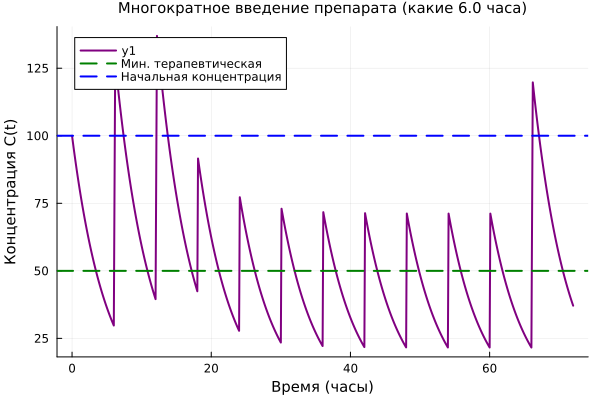

In [27]:
# Модель с повторными дозами

function pk_multiple_doses(C0, ke, dose, tau, t_total, h)
    t = 0.0:h:t_total
    C = zeros(length(t))
    C[1] = C0
    
    for i in 1:(length(t)-1)
        # Обычное выведение
        C[i+1] = C[i] + h * (-ke * C[i])
        
        # Проверка на введение новой дозы
        if mod(t[i], tau) < h && t[i] > 0
            C[i+1] += dose  # Добавляем дозу
        end
    end
    
    return t, C
end

# Параметры
dose = 50.0        # Доза (мг/л)
tau = 6.0          # Интервал между дозами (часы)
t_total = 72.0     # 3 суток наблюдения

t_multi, C_multi = pk_multiple_doses(C0, ke, dose, tau, t_total, 0.1)

# График
plot(t_multi, C_multi, linewidth=2, color=:purple)
hline!([C0/2], label="Мин. терапевтическая", linestyle=:dash, color=:green)
hline!([C0], label="Начальная концентрация", linestyle=:dash, color=:blue)
xlabel!("Время (часы)")
ylabel!("Концентрация C(t)")
title!("Многократное введение препарата (какие $(tau) часа)")

## Сравнение моделей: Что общего?

| Характеристика | SIR-модель | Фармакокинетика |
|---------------|------------|-----------------|
| **Тип ОДУ** | Система нелинейных | Линейное одно уравнение |
| **Точное решение** | Нет (численное) | Есть (экспонента) |
| **Сохранение** | $S+I+R = const$ | Масса препарата убывает |
| **Применение** | Эпидемиология, экология | Клиническая фармакология |
| **Параметры** | $\beta, \gamma$ | $k_e, t_{1/2}$ |

## Практическое задание

1. **SIR-модель:** Добавьте вакцинацию (переход S→R без болезни). Как это влияет на пик эпидемии?

2. **Фармакокинетика:** Реализуйте двухкамерную модель (кровь + ткани):
   $$
   \begin{cases}
   \frac{dC_1}{dt} = -k_{12}C_1 + k_{21}C_2 - k_e C_1 \\
   \frac{dC_2}{dt} = k_{12}C_1 - k_{21}C_2
   \end{cases}
   $$

3. **Исследование:** Найдите оптимальный шаг $h$ для SIR-модели, при котором сумма $S+I+R$ отклоняется не более чем на 1%.

In [28]:
# Бонус: Интерактивный калькулятор периода полувыведения

function calculate_dosing_regimen(C_target, ke, bioavailability=1.0)
    # Расчёт дозы для поддержания целевой концентрации
    # C_ss = (Dose × F) / (CL × tau)
    # где CL = ke × Vd (клиренс)
    
    t_half = log(2) / ke
    tau_optimal = t_half  # Дозирование каждые t_half
    
    println("="^50)
    println("РЕКОМЕНДАЦИИ ПО ДОЗИРОВАНИЮ")
    println("="^50)
    println("Период полувыведения: $(round(t_half, digits=2)) часов")
    println("Оптимальный интервал: $(round(tau_optimal, digits=2)) часов")
    println("Целевая концентрация: $C_target мг/л")
    println("="^50)
end

# Пример расчёта
calculate_dosing_regimen(50.0, 0.2)

РЕКОМЕНДАЦИИ ПО ДОЗИРОВАНИЮ
Период полувыведения: 3.47 часов
Оптимальный интервал: 3.47 часов
Целевая концентрация: 50.0 мг/л


## Ключевые выводы для биомедицинского моделирования

1. **Параметры имеют физический смысл** — $\beta$, $\gamma$, $k_e$ измеряются в экспериментах
2. **Качественное поведение важнее точности** — часто нужно понять, будет ли эпидемия, а не точное число заражённых
3. **Сохранение законов** — проверяйте $S+I+R=const$, массу, энергию
4. **Чувствительность к параметрам** — маленькие изменения $\beta$ могут радикально менять исход

В следующих частях курса мы расширим эти модели:
*   **Часть 3:** Популяционная динамика (Лотка-Вольтерра)
*   **Часть 4:** Инсулин-глюкоза, иммунный ответ
*   **Часть 6:** Эпидемиологические модели (SEIR, возрастные группы)